# Noise
***

#### Options
1. rotation error
2. tsp error
3. decay
4. decoheremce
5. thermal factor

### Incorporating Noise

In [1]:
from qiskit import *
%matplotlib inline
import matplotlib.pyplot as plt

Noises can be added in the options which are passed to the backend.

In [15]:
# The Circuit
q = QuantumRegister(3)
c = ClassicalRegister(3)
qc = QuantumCircuit(q,c)
qc.u1(3.6,0)
qc.cx(0,1)
qc.u1(2.6,2)
qc.cx(1,0)
qc.s(2)
qc.y(2)
qc.measure(q,c,basis='Ensemble',add_param='Z')
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options1 = {
    "thermal_factor": 0.,
    "decoherence_factor": .9,
    "depolarization_factor": 0.99,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1., 0.], 'ry':[1., 0.], 'rz': [1., 0.]},
    "tsp_model_error": [1., 0.],
    "plot": False
}
# Execution with and without noise
run = execute(qc,backend,**options)
result = run.result()
run_error = execute(qc,backend,**options1)
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob1 = result_error['results'][0]['data']['ensemble_probability']

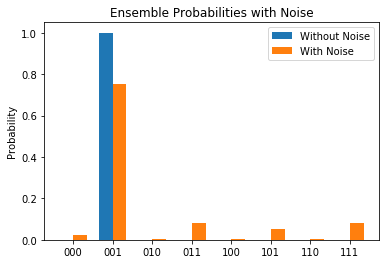

In [16]:
import numpy as np
labels = prob1.keys()
without_noise = prob.values()
with_noise = prob1.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.show()